# Pandas - explode()

In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


<Axes: xlabel='job_skills'>

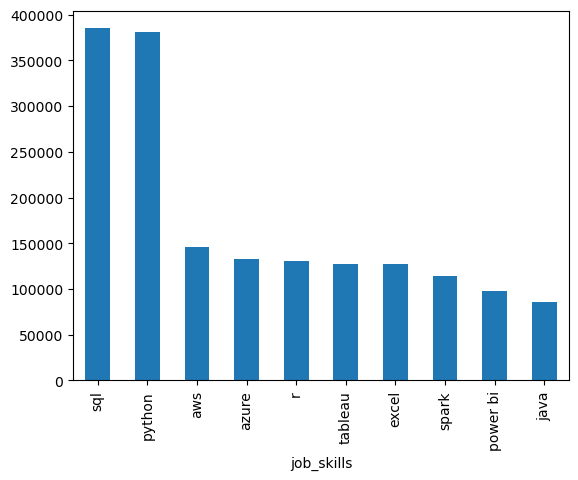

In [13]:
df_exploded = df.explode('job_skills')

df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [14]:
df_exploded = df.explode('job_skills')

In [17]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [30]:
type(skills_count)

pandas.core.series.Series

In [33]:
# It is preferable to convert the type to DataFrame
df_skills_count = skills_count.reset_index()

df_skills_count

,job_title_short,job_skills,0
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [41]:
df_skills_count = skills_count.reset_index(name='skills_count')

df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count


,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [42]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title ].head(top_skills)

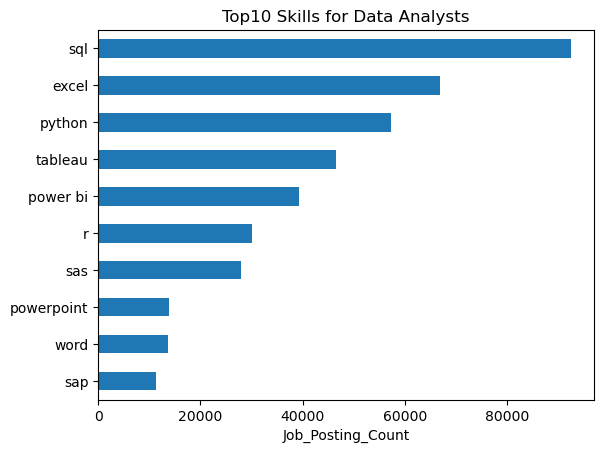

In [52]:
df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title(f'Top{top_skills} Skills for {job_title}s')
plt.xlabel('Job_Posting_Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()